In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [91]:
states = gpd.read_file('data/50-22_init_point/usa-states-census-2014.shp')
tornado = gpd.read_file('data/50-22_init_point/1950-2022-torn-initpoint.shp')
torn_paths = gpd.read_file('data/50-22_init_point/1950-2018-torn-aspath.shp')
bounds = gpd.read_file('data/cb_2017_us_state_500k/cb_2017_us_state_500k.shp')

In [92]:
states[states['NAME'] == 'Texas']

STATEFP   STATENS     AFFGEOID GEOID STUSPS   NAME LSAD         ALAND   
16      48  01779801  0400000US48    48     TX  Texas   00  676601887070  \

         AWATER     region                                           geometry  
16  19059877230  Southwest  POLYGON Z ((-106.62345 31.91403 0.00000, -106....

In [93]:
tornado = tornado.drop(columns=['date'])

In [94]:
tornado.head()

om    yr  mo  dy      time  tz  st  stf  stn  mag  ...  loss  closs   
0  192  1950  10   1  21:00:00   3  OK   40   23    1  ...   4.0    0.0  \
1  193  1950  10   9  02:15:00   3  NC   37    9    3  ...   5.0    0.0   
2  195  1950  11  20  02:20:00   3  KY   21    1    2  ...   5.0    0.0   
3  196  1950  11  20  04:00:00   3  KY   21    2    1  ...   5.0    0.0   
4  197  1950  11  20  07:30:00   3  MS   28   14    1  ...   4.0    0.0   

    slat    slon     elat      elon   len  wid  fc   
0  36.73 -102.52  36.8800 -102.3000  15.8   10   0  \
1  34.17  -78.60  34.1701  -78.5999   2.0  880   0   
2  37.37  -87.20  37.3701  -87.1999   0.1   10   0   
3  38.20  -84.50  38.2001  -84.4999   0.1   10   0   
4  32.42  -89.13  32.4201  -89.1299   2.0   37   0   

                      geometry  
0  POINT (-102.52000 36.73000)  
1   POINT (-78.60000 34.17000)  
2   POINT (-87.20000 37.37000)  
3   POINT (-84.50000 38.20000)  
4   POINT (-89.13000 32.42000)  

[5 rows x 22 columns]

In [95]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
states = states.to_crs('EPSG:3395')

In [97]:
tornado.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [98]:
tornado = tornado.to_crs('EPSG:3395')

<Axes: >

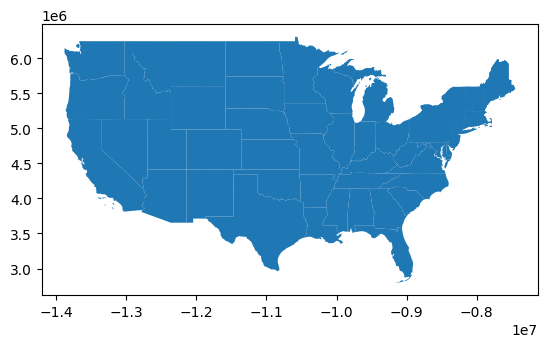

In [99]:
states.plot()

<Axes: >

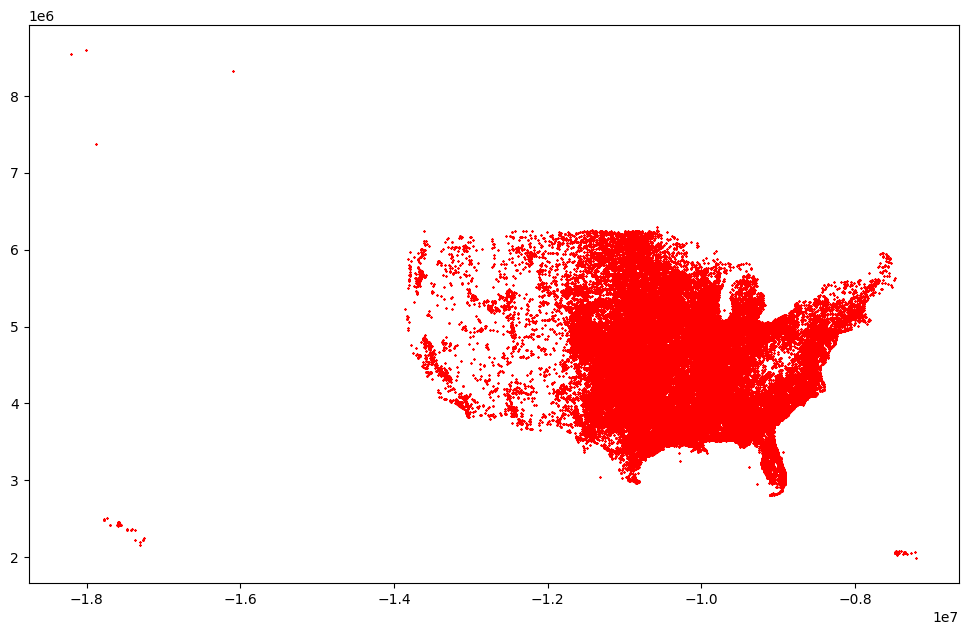

In [100]:
tornado.plot(figsize=(12,9), color='red', marker='x', markersize=1)

<Axes: >

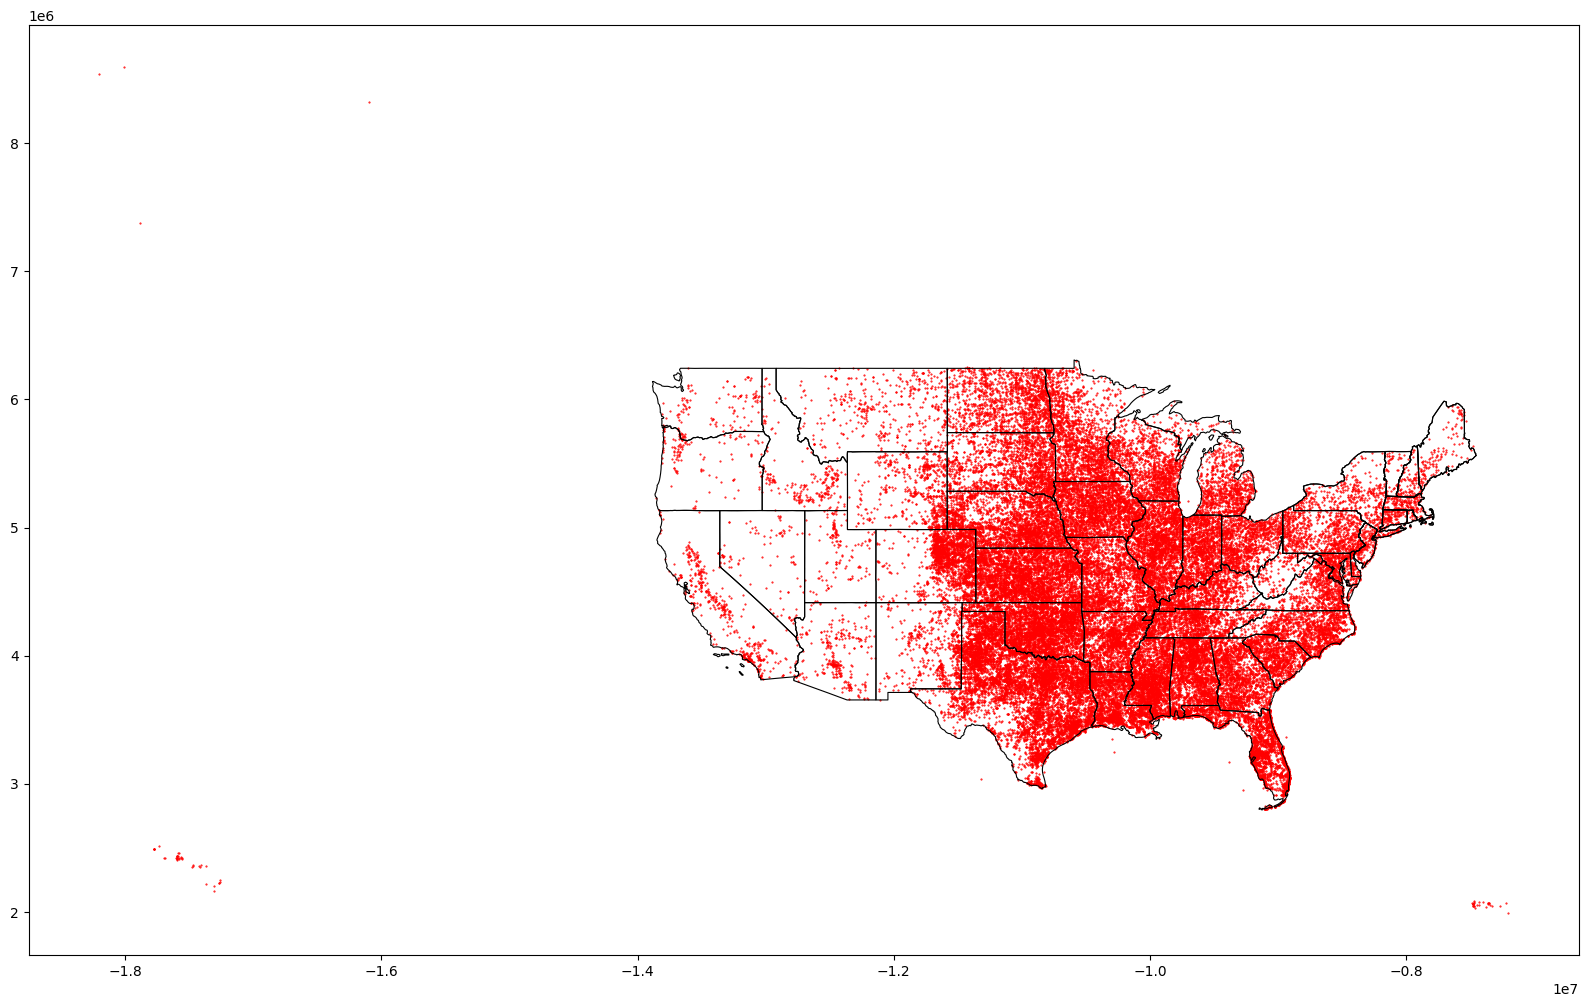

In [101]:
fig = plt.figure(1, figsize=(20,20)) 
ax = fig.add_subplot()
states.boundary.plot(ax=ax, color='black', linewidth=.8)

tornado.plot(ax=ax, color='red', marker='.', markersize=1)

In [102]:
# fig = plt.figure(1, figsize=(12,9)) 
# ax = fig.add_subplot()

# ax.set_xlim(-14100244, -7200000)
# ax.set_ylim(2600000, 6550000)

# fig.suptitle('United States Tornado Map (1950-2018)', fontsize=16)

# states.boundary.plot(ax=ax, color='black', linewidth=.8)

# tornado.plot(ax=ax, color='red', marker='v', markersize=8)

In [103]:
torn_paths = torn_paths.to_crs("EPSG:3395")

In [104]:
torn_paths.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

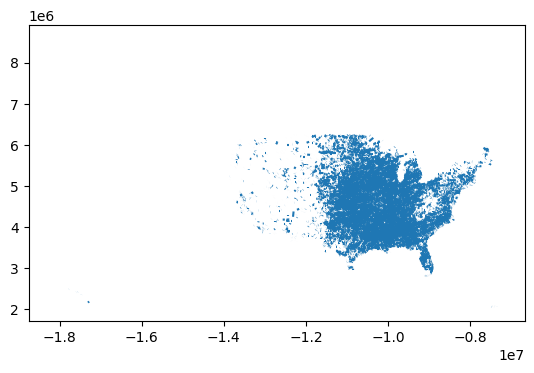

In [105]:
torn_paths.plot()

In [106]:
torn_sts = tornado.copy()

In [107]:
torn_sts['tornados'] = 1

In [108]:
# torn_sts = torn_sts[['tornados', 'st']].groupby('st').count()
# torn_sts.sort_values('tornados', ascending=False)

<Axes: >

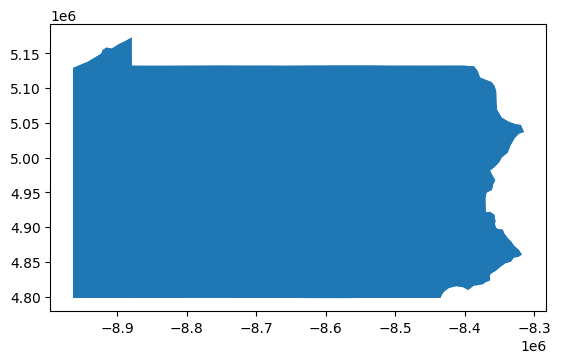

In [116]:
state_map = states[states['NAME'] == 'Pennsylvania']
state_map.plot()

In [118]:
def tornado_start():
    abbr = input('Please enter a state abbreviation: ')
    state_map = states[states['STUSPS'] == abbr]
    torn_start = tornado[tornado['st'] == abbr]
    # tornado_path = torn_paths[torn_paths['st'] == abbr]
    
    fig = plt.figure(1, figsize=(13,13)) 
    ax = fig.add_subplot()
    

    fig.suptitle(f'{abbr} Tornado Paths (1950-2022)', fontsize=16)

    state_map.boundary.plot(ax=ax, color='black', linewidth=.8)

    # plotting tornado paths
    torn_start.plot(ax=ax, color='pink', marker='v', markersize=20)
    # tornado_path.plot(ax=ax, color='red')
    

Please enter a state abbreviation: GA


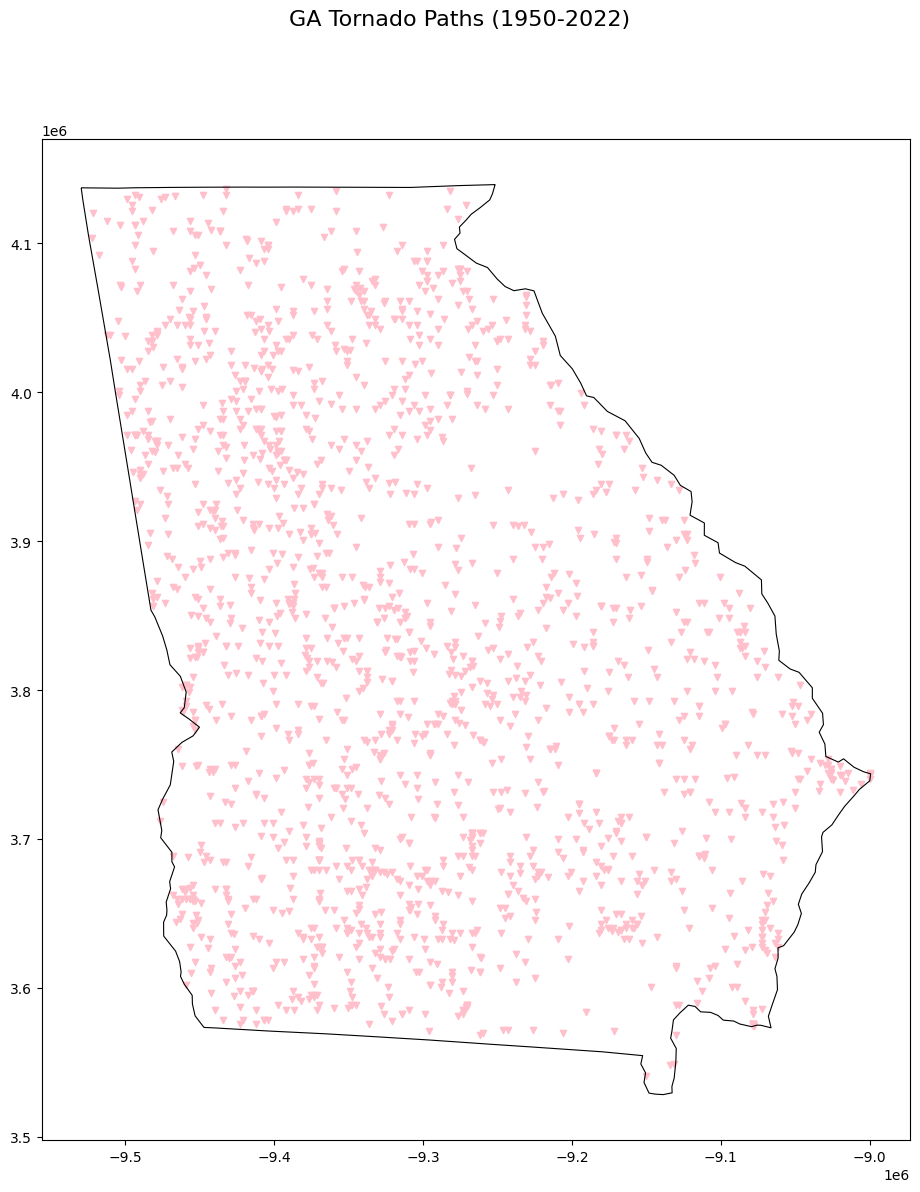

In [119]:
tornado_start()

In [110]:
def tornado_path():
    abbr = input('Please enter a state abbreviation: ')
    state_map = states[states['STUSPS'] == abbr]
    torn_start = tornado[tornado['st'] == abbr]
    tornado_path = torn_paths[torn_paths['st'] == abbr]
    
    fig = plt.figure(1, figsize=(13,13)) 
    ax = fig.add_subplot()
    

    fig.suptitle(f'{abbr} Tornado Paths (1950-2022)', fontsize=16)

    state_map.boundary.plot(ax=ax, color='black', linewidth=.8)

    # plotting tornado paths
    torn_start.plot(ax=ax, color='pink', marker='v', markersize=20)
    tornado_path.plot(ax=ax, color='red')

In [111]:
# states

Please enter a state abbreviation: GA


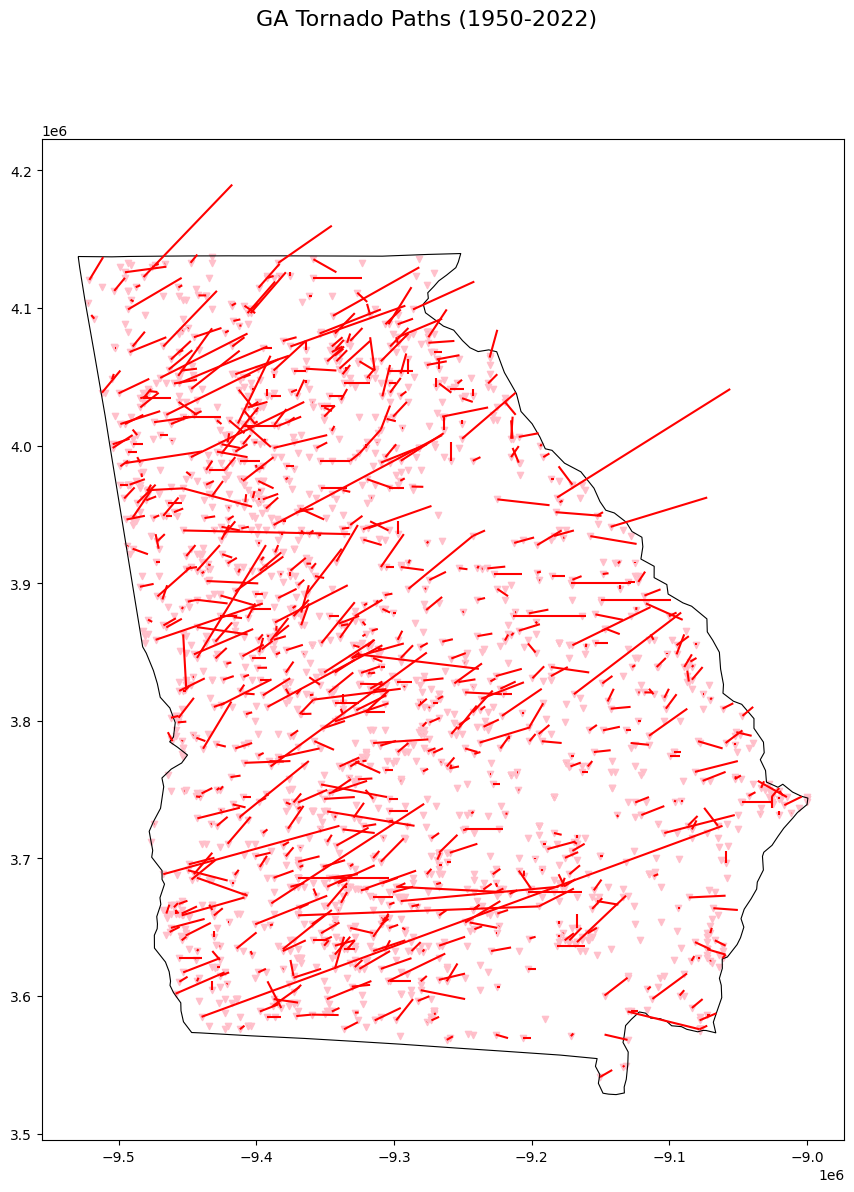

In [115]:
tornado_path()

In [120]:
def tornado_year():
    abbr = input('Please enter a state abbreviation: ')
    state_map = states[states['STUSPS'] == abbr]
    torn_start = tornado[tornado['st'] == abbr]
    tornado_path = torn_paths[torn_paths['st'] == abbr]
    
    fig = plt.figure(1, figsize=(13,13)) 
    ax = fig.add_subplot()
    

    fig.suptitle(f'{abbr} Tornado by Year (1950-2022)', fontsize=16)

    state_map.boundary.plot(ax=ax, color='black', linewidth=.8)
    
    # plotting by year
    torn_start.plot(ax=ax, column='yr', cmap="coolwarm", marker='v', markersize=20)
    # tornado_path.plot(ax=ax, column='yr', cmap="coolwarm")

Please enter a state abbreviation: GA


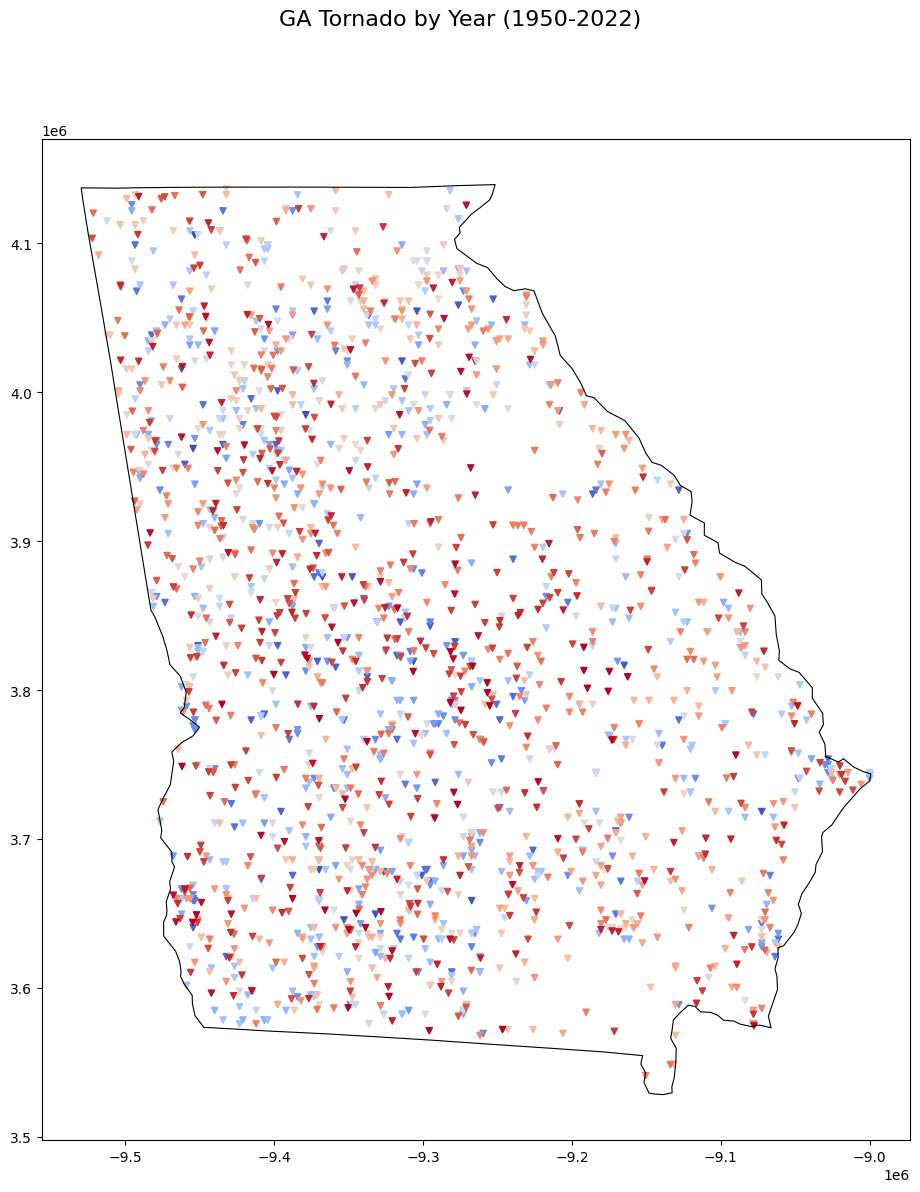

In [121]:
tornado_year()